CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 3 index: effectiveness, popularity, and complexity. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [344]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())

   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences.

<b>Data select:</b>
<ul>
    <li>Num Game</li>
    <li>Perf Rating</li>
    <li>Avg Player Rating</li>
    <li>Player Win %</li>
    <li>Draw %</li>
    <li>Opponent Win %</li>
    <li>Number of moves</li>
</ul>

<ol>
<li>
Popularity indicator:
    <ul>
    <li>Num Games: How frequently the opening is used.</li>
    </ul>
</li>
<li>
Performance indicator:
    <ul>
    <li>Perf : delta between player Rating and his performance rating</li>
    <li>Player Win % 
    <li>Draw %</li>
    <li>Opponent Win %</li> 
     =>Direct outcomes when the opening is used.
    </ul>
</li>
<li>
Complexity indicator:
    <ul>
    <li>Number of moves: The length and complexity of the opening moves can indicate strategic depth.</li>
    <li>Number of variations: The number of possible move sequences can reflect the complexity of the opening.</li>
    </ul>
</li>
</ol>

In [345]:
# add a column to the dataframe
df['Num Moves'] = df['moves_list'].apply(lambda x: len(x.split()))

# # add the data last_played, a number of days since the last played game
# df['Last Played'] = df['Last Played'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days)



In [346]:
selected_variable = ['Opening', 'Colour', 'Num Games', 'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %','Num Moves']

df = df[selected_variable]

# print(df.head())

# Split the 'Opening' column into 'Opening Name' and 'Variation' based on the first comma
df[['Opening Name', 'Variation']] = df['Opening'].str.split(',', n=1, expand=True)

# print(df.sample(5))

# Strip any leading or trailing whitespace characters that may have appeared from the split
df['Opening Name'] = df['Opening Name'].str.strip()
df['Variation'] = df['Variation'].str.strip()

# Group by 'Opening Name' and aggregate the data
# For numeric columns like 'Num Games', 'Perf Rating', etc., you can sum or average them
# Count the number of variations for each opening
aggregated_data = df.groupby('Opening Name').agg({
    'Num Games': 'sum',
    'Perf Rating': 'mean',
    'Avg Player': 'mean',
    'Player Win %': 'mean',
    'Draw %': 'mean',
    'Opponent Win %': 'mean',
    'Num Moves': 'mean',
    'Variation': 'count'  # Counts the number of variations
}).rename(columns={'Variation': 'Num Variations', 'Num Moves': 'Avg Num Moves'})

# If number of variations is 0, set it to 1
aggregated_data['Num Variations'] = aggregated_data['Num Variations'].apply(lambda x: x if x > 0 else 1)

# calculate the delta variation betwenn the Avg Player and the Perf Rating
aggregated_data['DeltaPerf'] = aggregated_data['Perf Rating'] - aggregated_data['Avg Player']

# Reset index to make 'Opening Name' a column again
aggregated_data.reset_index(inplace=True)

# Save the modified dataframe to a new CSV file or continue analysis
aggregated_data.to_csv('archive/modified_openings.csv', index=False)

print(aggregated_data.sample(5))
print(aggregated_data.info())

data = pd.read_csv('archive/modified_openings.csv')



             Opening Name  Num Games  Perf Rating  Avg Player  Player Win %  \
85  Three Knights Opening       2551  2244.333333    2244.000        38.900   
45         Mieses Opening       1247  2145.000000    2135.000        39.000   
59         Polish Defense       1067  2093.000000    2168.000        31.000   
77      Semi-Slav Defense      69212  2314.350000    2311.700        35.595   
29      Hungarian Opening      18777  2229.625000    2245.375        29.075   

       Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  
85  26.833333       34.266667       6.666667               3   0.333333  
45  22.700000       38.300000       1.500000               2  10.000000  
59  22.200000       46.800000       2.000000               1 -75.000000  
77  31.835000       32.565000      13.825000              40   2.650000  
29  30.300000       40.637500       2.625000               8 -15.750000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data column

In [347]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate:", data.duplicated().sum())

Opening Name      0
Num Games         0
Perf Rating       0
Avg Player        0
Player Win %      0
Draw %            0
Opponent Win %    0
Avg Num Moves     0
Num Variations    0
DeltaPerf         0
dtype: int64

Number of duplicate: 0


In [348]:
from sklearn.preprocessing import StandardScaler
# Normalize the data

# List of columns to normalize
columns_to_normalize = ['Perf Rating', 'Player Win %', 'Num Games','Avg Player' , 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'DeltaPerf']

# Apply Min-Max scaling
# for column in columns_to_normalize:
    # data[column + ' (Normalized)'] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

# Apply Standard scaling
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Show the head of the DataFrame to verify normalization
print(data.head())


# Reverse the Opponent Win % normalization because a lower opponent win rate is better for the opening
data['Opponent Win %'] = 1 - data['Opponent Win %']

# Reverse the Num Moves normalization because a lower number of moves is better
data['Avg Num Moves'] = 1 - data['Avg Num Moves']

# Reverse the Num Variations normalization because a lower number of variations is better
data['Num Variations'] = 1 - data['Num Variations']

print(data.sample(5))

# Save the normalized DataFrame to a new CSV file
data.to_csv('archive/normalized_data.csv', index=False)

# In normalized_data, remove the columns that are not normalized
data = pd.read_csv('archive/normalized_data.csv')

        Opening Name  Num Games  Perf Rating  Avg Player  Player Win %  \
0   Alekhine Defense  -0.030612     0.173147    0.119049      0.138871   
1  Anderssen Opening  -0.411186    -0.651590   -0.717208      0.042620   
2       Benko Gambit  -0.146453     0.538050    0.330533      1.027777   
3     Benoni Defense   0.221531     0.719271    0.702851      0.509623   
4       Bird Opening  -0.240200    -1.054496   -1.055993      0.673434   

     Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  
0 -0.139535        0.028863       0.318673        0.188209   0.216273  
1 -0.347081        0.312824      -1.618484       -0.533010   0.161808  
2 -0.421481       -0.392053       1.183168       -0.089183   0.814904  
3 -0.243438       -0.158685       1.427668        0.548818   0.143427  
4 -0.796786        0.263700      -0.800333       -0.422053  -0.117595  
              Opening Name  Num Games  Perf Rating  Avg Player  Player Win %  \
48   Neo-Gruenfeld Defense  -0.248108     1

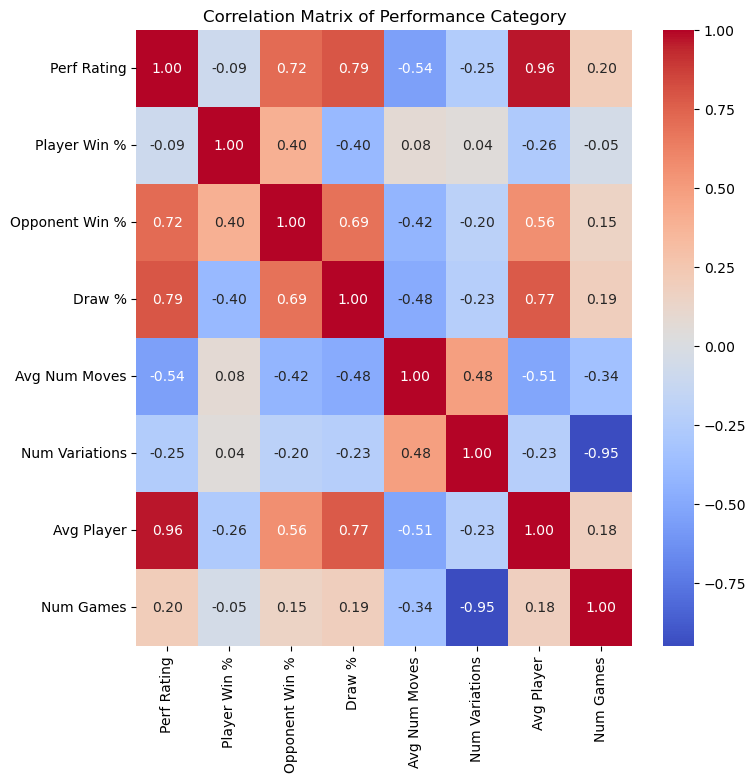

In [349]:
# scatter plot on the variables from the performance category

import seaborn as sns
import matplotlib.pyplot as plt

# Select the normalized columns
normalizes_data = data[['Perf Rating', 'Player Win %', 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'Avg Player', 'Num Games']]

# Calculate the correlation matrix
corr_matrix = normalizes_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Performance Category')
plt.show()




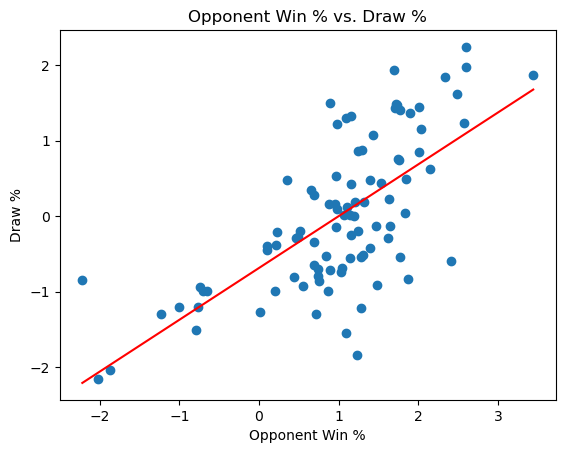

In [350]:
import numpy as np

plt.title("Opponent Win % vs. Draw %")
plt.xlabel("Opponent Win %")
plt.ylabel("Draw %")
plt.scatter(data['Opponent Win %'], data['Draw %'])
plt.plot(np.unique(data['Opponent Win %']), np.poly1d(np.polyfit(data['Opponent Win %'], data['Draw %'], 1))(np.unique(data['Opponent Win %'])), color='red')


In [351]:
from scipy.stats import pearsonr

corr = pearsonr(data['Opponent Win %'], data['Draw %'])
print(corr)

PearsonRResult(statistic=0.6870656552223079, pvalue=2.862711958416631e-14)


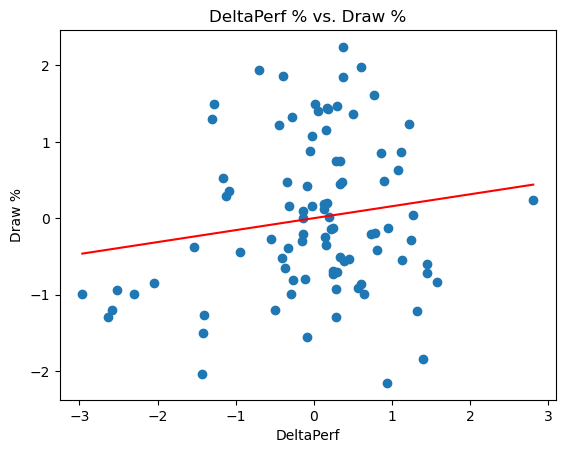

In [361]:
plt.title("DeltaPerf % vs. Draw %")
plt.xlabel("DeltaPerf")
plt.ylabel("Draw %")
plt.scatter(data['DeltaPerf'], data['Draw %'])
plt.plot(np.unique(data['DeltaPerf']), np.poly1d(np.polyfit(data['DeltaPerf'], data['Draw %'], 1))(np.unique(data['DeltaPerf'])), color='red')

In [362]:
coor = pearsonr(data['DeltaPerf'], data['Draw %'])
print(coor)


PearsonRResult(statistic=0.15643301312772817, pvalue=0.13645526979525352)


PearsonRResult(statistic=-0.3951954774109885, pvalue=8.839289257710953e-05)


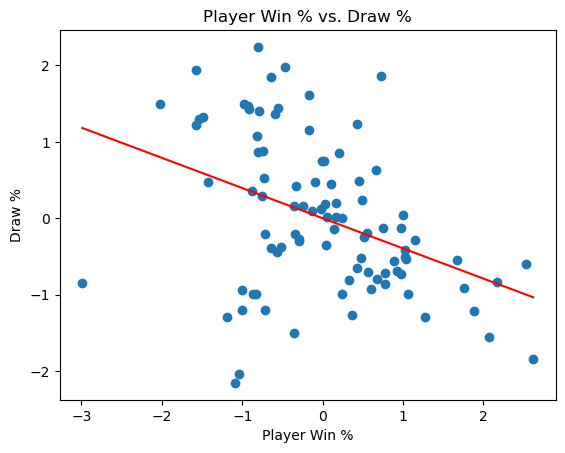

In [354]:
plt.title("Player Win % vs. Draw %")
plt.xlabel("Player Win %")
plt.ylabel("Draw %")
plt.scatter(data['Player Win %'], data['Draw %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Draw %'], 1))(np.unique(data['Player Win %'])), color='red')

coor = pearsonr(data['Player Win %'], data['Draw %'])
print(coor)

PearsonRResult(statistic=0.3959111291832093, pvalue=8.559628397478799e-05)


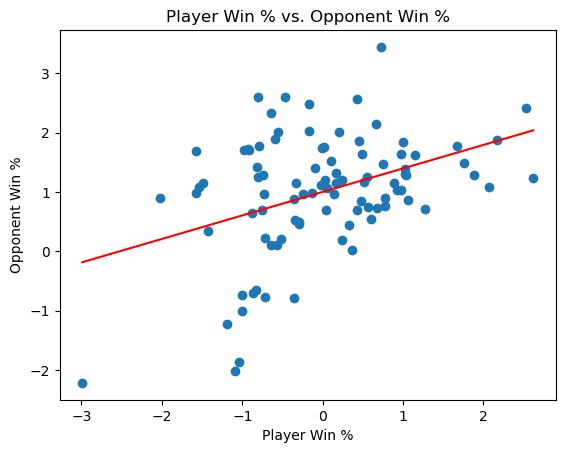

In [355]:
plt.title("Player Win % vs. Opponent Win %")
plt.xlabel("Player Win %")
plt.ylabel("Opponent Win %")
plt.scatter(data['Player Win %'], data['Opponent Win %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Opponent Win %'], 1))(np.unique(data['Player Win %'])), color='red')

coor = pearsonr(data['Player Win %'], data['Opponent Win %'])
print(coor)

PearsonRResult(statistic=-0.09468396233790338, pvalue=0.36664264316456446)


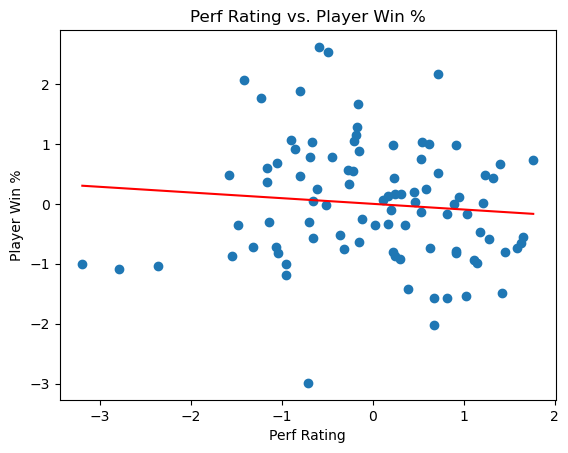

In [356]:
plt.title("DeltaPerf vs. Player Win %")
plt.xlabel("DeltaPerf")
plt.ylabel("Player Win %")
plt.scatter(data['DeltaPerf'], data['Player Win %'])
plt.plot(np.unique(data['DeltaPerf']), np.poly1d(np.polyfit(data['DeltaPerf'], data['Player Win %'], 1))(np.unique(data['DeltaPerf'])), color='red')

coor = pearsonr(data['DeltaPerf'], data['Player Win %'])
print(coor)


PearsonRResult(statistic=0.7162731063033942, pvalue=6.957841823480503e-16)


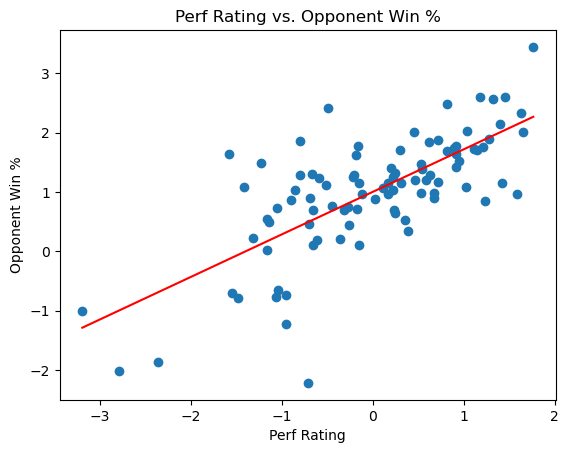

In [357]:
plt.title("Perf Rating vs. Opponent Win %")
plt.xlabel("Perf Rating")
plt.ylabel("Opponent Win %")
plt.scatter(data['Perf Rating'], data['Opponent Win %'])
plt.plot(np.unique(data['Perf Rating']), np.poly1d(np.polyfit(data['Perf Rating'], data['Opponent Win %'], 1))(np.unique(data['Perf Rating'])), color='red')

coor = pearsonr(data['Perf Rating'], data['Opponent Win %'])
print(coor)

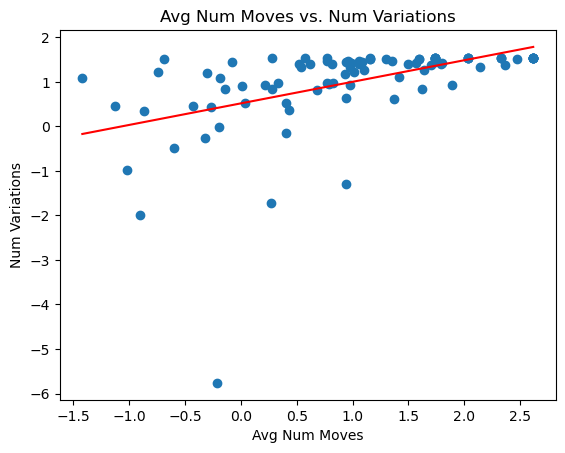

In [358]:
plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')


PearsonRResult(statistic=0.5608883949384598, pvalue=6.061663410981866e-09)


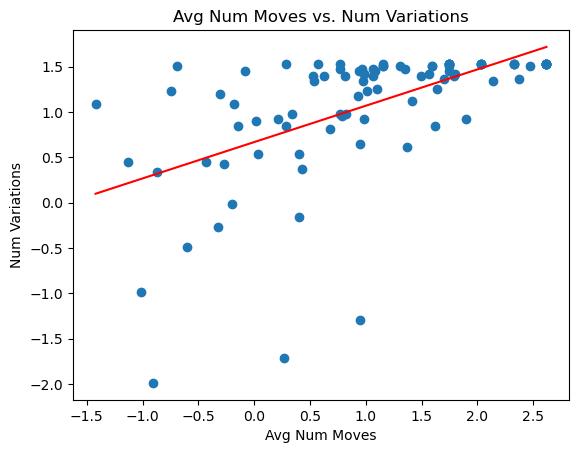

In [359]:
# Remove outlier data points
data = data[(data['Avg Num Moves'] > -4) & (data['Num Variations'] > -4)]

# Calculate the correlation between 'Avg Num Moves' and 'Num Variations'
corr = pearsonr(data['Avg Num Moves'], data['Num Variations'])
print(corr)

plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')

In [360]:
# Avg Num Moves and Num Variations are not higly correlated and the p-value is very significant, we will use this two variable to create a sub-indicator "Complexity"

# Calculate the complexity of the opening
weight = 0.5
data['Complexity'] = weight * data['Avg Num Moves'] + weight * data['Num Variations']